<a href="https://colab.research.google.com/github/troncosofranco/flask/blob/main/Retail_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Introduction
The objective of this project is to create an interactive web application to predict rental demand using regression model. The dataset has been provided by the UCI Machine Learning Repository 
of the University of California, Irvine. The dataset contains information about bike rental demand over time and 
under different environmental factors, being the objective predict future demand. 

The dataset contains the following features:
- **instant:** record index.
- **dteday:** date.
- **season:** season (1: spring, 2: summer, 3: fall, 4: winter).
- **yr:** year (0: 2011, 1:2012).
- **mnth:** month (1 to 12).
- **hr:** hour (0 to 23).
- **holiday:** whether day is holiday or not.
- **weekday:** day of the week.
- **workingday:** weekend nor holiday it is 1, otherwise it is 0.
- **weathersit:** 
  - 1: Clear, Few clouds, Partly cloudy. 
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist. 
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
- **temp:** Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min = -8, t_max = +39 (only in hourly scale).
- **atemp:** Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min = -16, t_max = +50 (only in hourly scale).
- **hum:** Normalized humidity: The values are divided by 100 (max).
- **windspeed:** Normalized wind speed: The values are divided by 67 (max).
- **casual:** count of casual users registered count of registered users.
- **cnt:** count of total rental bikes including both casual and registered.

#1. Import modules

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#2. Load Data

In [ ]:
bikes_hour_df_raw = pd.read_csv('hour.csv')
bikes_day_df_raw = pd.read_csv('day.csv')

#3. Explore data

In [ ]:
bikes_hour_df_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Removing useless features for our goal.

In [ ]:
bikes_hour_df = bikes_hour_df_raw.drop(['casual', 'registered'], axis=1)

Getting information about features.

In [ ]:
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


**Observation:** No missing values were found.

Explore the target label 'cnt'.

In [ ]:
bikes_hour_df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

**Observation:** The label “cnt” ranges between a minimum of 1 and maximum of 977 counts. The average rental count is 189.5 units.

##3.1. Quantitative Features vs. Rental Counts

Rental Counts vs. Temperature

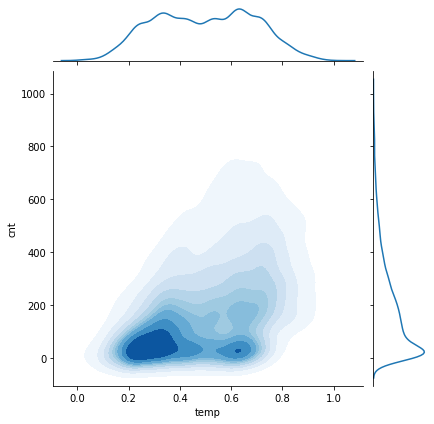

In [ ]:
sns.jointplot(x=bikes_hour_df['temp'], y=bikes_hour_df['cnt'], cmap="Blues", shade=True, kind='kde')
plt.show()

Rental Counts Vs Feeling temperature

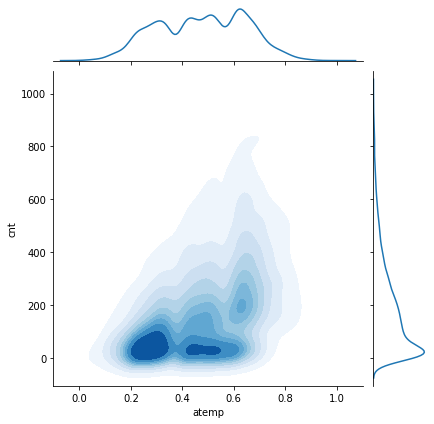

In [ ]:
sns.jointplot(x=bikes_hour_df['atemp'], y=bikes_hour_df['cnt'], cmap="Blues", shade=True, kind='kde')
plt.show()

Rental Counts Vs Normalized humidity

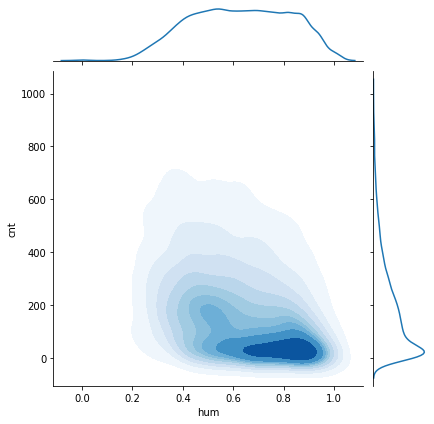

In [ ]:
sns.jointplot(x=bikes_hour_df['hum'], y=bikes_hour_df['cnt'], cmap="Blues", shade=True, kind='kde')
plt.show()




Rental Counts Vs Wind Speed.

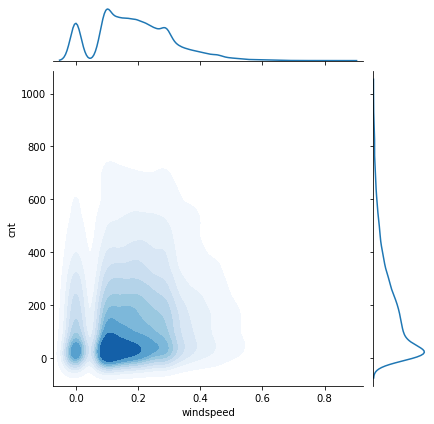

In [ ]:
sns.jointplot(x=bikes_hour_df['windspeed'], y=bikes_hour_df['cnt'], cmap="Blues", shade=True, kind='kde')
plt.show()

##3.2. Categorical Features Vs Rental Counts

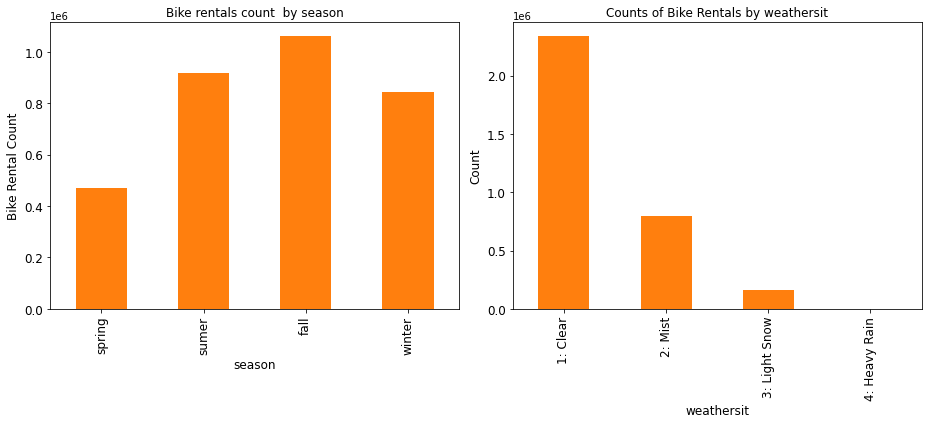

In [ ]:
# Season
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))
ax1 = bikes_hour_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Bike rentals count  by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Bike Rental Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])


# Weathersit 
ax2 = bikes_hour_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])
f.tight_layout()

Rental Counts Vs Time

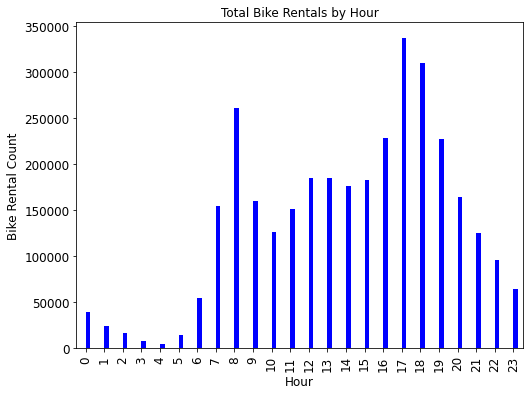

In [ ]:
ax = bikes_hour_df[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='blue', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Bike Rental Count", fontsize=12)
plt.show()

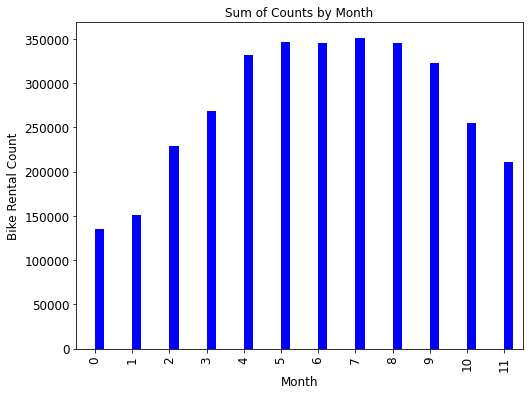

In [ ]:
ax = bikes_hour_df[['mnth','cnt']].groupby(['mnth']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Sum of Counts by Month", 
                                       color='blue', fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Bike Rental Count", fontsize=12)
plt.show()

**Observation:** “temp” and “atemp” features show similar distributions and may present redundancy and even multicollinearity. Thus, “atemp” will drop. Bike rental counts cover a broad range of humidity. On ther other hand, feature “windspeed”  show an inverse linear relationship with rentals. The bike rental counts decrease on windy days.The highest rental counts was observed at 17 h, showing a broad range between 12 and 19 h. At 8 h, the bike rental counts is relatively high. On the other hand, the highest bike rental counts were observed between april and august. 


#4. Model 

##4.1. Linear regression

Make a copy for editing without affecting original.

In [ ]:
bike_df_model = bikes_hour_df.copy()

Define features and target label

In [ ]:
target = 'cnt'

# create a feature list for each modeling
features = [feat for feat in list(bike_df_model) if feat not in [target, 'instant', 'dteday']]

Split data into train and test portions and model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bike_df_model[features], bike_df_model[['cnt']], 
                                                 test_size=0.2, random_state=2020)

Linear Regression model

In [ ]:
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error: 141.96


##4.2. Second degree polynomial


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 2 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error with PolynomialFeatures set to 2 degrees: 121.54


##4.3. Third degree polynomial

In [ ]:
# make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()

outcome = 'cnt'
# create a feature list for eash modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
 
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 3 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error with PolynomialFeatures set to 3 degrees: 108.74


##4.4. Dummy Features from Categorical Data

From “weathersit” will be created four new columns: “clear,” “mist,” “snow,” and “rain” and assign each a binary true/false value.

In [ ]:
def get_dummy(raw_dataframe, target_columns, drop_first = False, make_na_col = True):
    
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, 
                                     drop_first=drop_first, 
                                     dummy_na=make_na_col)
    return (dataframe_dummy) 

Linear Regression

In [ ]:
bike_df_model = bike_df_model.sort_values('instant')

bike_df_model = get_dummy(bike_df_model, target_columns = ['season', 'weekday', 'weathersit'], drop_first = True)

# remove the nan colums in dataframe 
bike_df_model = bike_df_model.dropna() 


X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.2, 
                                                 random_state=42)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# print coefficients as this is what our web application will use in the end
print('Coefficients: \n', model_lr.coef_)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Coefficients: 
 [[ 2.05179924e+01  8.28448751e+01  1.19190430e-01  7.66249868e+00
  -2.41182267e+01  1.77763984e+00  3.90418826e+00 -3.43318981e+00
   9.90484375e+01  2.04992854e+02 -1.99467977e+02  3.44906487e+01]]
Root Mean squared error: 139.21


Gradient Boosting Regressor (GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, 
predictions)))

Root Mean squared error: 69.06


##4.5. Time Modeling

Keep track of the previous hour's count and use that as a feature for the model.

In [ ]:
bikes_hour_df_shift = bikes_hour_df[['dteday','hr','cnt']].groupby(['dteday','hr']).sum().reset_index()
bikes_hour_df_shift.sort_values(['dteday','hr'])

,dteday,hr,cnt
0,2011-01-01,0,16
1,2011-01-01,1,40
2,2011-01-01,2,32
3,2011-01-01,3,13
4,2011-01-01,4,1
...,...,...,...
17374,2012-12-31,19,119
17375,2012-12-31,20,89
17376,2012-12-31,21,90
17377,2012-12-31,22,61


Shift the count of the last two hours forward so the new count can take in consideration how the last two hours performed.

In [ ]:
bikes_hour_df_shift['sum_hr_shift_1'] = bikes_hour_df_shift.cnt.shift(+1)
bikes_hour_df_shift['sum_hr_shift_2'] = bikes_hour_df_shift.cnt.shift(+2)

Merge the date and hour counts back.

In [ ]:
bike_df_model = pd.merge(bikes_hour_df, bikes_hour_df_shift[['dteday', 'hr', 'sum_hr_shift_1', 'sum_hr_shift_2']], how='inner', 
on = ['dteday', 'hr'])

Drop missing values generated by shifting fields around.

In [ ]:
bike_df_model = bike_df_model.dropna()

Gradient Boosting Regressor (GBM)

In [ ]:
target = 'cnt'
# create a feature list for each modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [target, 'instant', 'dteday','casual', 'registered']]  

X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error: 41.97


**Observation**: The best metric was obtained using GBM. However, GBM isn’t a linear model and doesn’t offer a handy and lightweight regression equation. The previois time shifts require that we have total counts for the two previous hours of prediction. In this case, the access to live data is limited. In the process of web applications development, if the most accurate prediction comes from a complicated modeling technique, it just won’t translate well into a production pipeline

#5. Extracting Regression Coefficients from a Simple Model

A linear regression model is not the most powerful model. However, it can determine data extremely simple and clear. During web applications development, we have to balance the best modeling scores with production realities. In this case, only four features will be used: “season”, “hr,” “holiday,” and “temp.” 


In [ ]:
# prior hours
np.mean(bikes_hour_df_shift['sum_hr_shift_1'])

189.47117044539073

Fit the linear regression model for each feature.

In [ ]:
features = ['hr', 'season', 'holiday', 'temp']
from sklearn import linear_model
from sklearn.metrics import r2_score

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
    
for feat in features:
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))

R^2 for hr is 0.159431
R^2 for season is 0.025891
R^2 for holiday is -0.001242
R^2 for temp is 0.168313


**Observation**: 'hr' and 'temp' represents better the target label than 'season' and 'holiday'

Fit the linear regression model for each feature ussing dummy.

In [ ]:
# simple approach - make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df[['hr', 'season', 'holiday', 'temp', 'cnt']].copy()

outcome = 'cnt'

# dummify categorical columns
bike_df_model_ready = get_dummy(bike_df_model_ready,  drop_first = False, 
                                             make_na_col = False, target_columns = ['season'])

features = [feat for feat in bike_df_model_ready if feat not in ['cnt']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()

for feat in features:
    model_lr = linear_model.LinearRegression()
    # train the model on training set
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))

R^2 for hr is 0.160129
R^2 for holiday is -0.000566
R^2 for temp is 0.166963
R^2 for season_1 is 0.058428
R^2 for season_2 is 0.004411
R^2 for season_3 is 0.021628
R^2 for season_4 is -0.001285


Obtain the coefficients form the model.

In [ ]:
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
 
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
print('\n')

# Intercept
print('Intercept: %f' % model_lr.intercept_)

# features with coefficients 
feature_coefficients  = pd.DataFrame({'coefficients':model_lr.coef_[0], 
                                    'features':X_train.columns.values})

feature_coefficients.sort_values('coefficients')

Root Mean squared error: 147.86


Intercept: -119.061877


,coefficients,features
5,-42.697445,season_3
1,-29.096613,holiday
4,-3.808865,season_2
3,3.523756,season_1
0,8.626766,hr
6,42.982554,season_4
2,425.523181,temp


Set up constants for previous coefficients.

In [ ]:
INTERCEPT = -119.061877
COEF_HOLIDAY = -29.096613   # day is holiday or not
COEF_HOUR = 8.626766        # hour (0 to 23)
COEF_SEASON_1 = 3.523756    # 1:springer
COEF_SEASON_2 = -3.808865   # 2:summer
COEF_SEASON_3 = -42.697445  # 3:fall
COEF_SEASON_4 = 42.982554   # 4:winter
COEF_TEMP = 425.523181      # norm temp in Celsius -8 to +39

Get the mean historical values in order to build our regression 
equation.

In [ ]:
np.mean(X_train['temp'])

0.4980583641594739

In [ ]:
# mean values
MEAN_HOLIDAY = 0.0275   # day is holiday or not
MEAN_HOUR = 11.6        # hour (0 to 23)
MEAN_SEASON_1 = 1       # 1:spring
MEAN_SEASON_2 = 0       # 2:summer
MEAN_SEASON_3 = 0       # 3:fall
MEAN_SEASON_4 = 0       # 4:winter
MEAN_TEMP = 0.4967      # norm temp in Celsius -8 to +39


# try predicting something - 9AM with all other features held constant
rental_counts = INTERCEPT + (MEAN_HOLIDAY * COEF_HOLIDAY) \
    + (9 * COEF_HOUR) \
    + (MEAN_SEASON_1 * COEF_SEASON_1)  + (MEAN_SEASON_2 * COEF_SEASON_2) \
    + (MEAN_SEASON_3 * COEF_SEASON_3)  + (MEAN_SEASON_4 * COEF_SEASON_4) \
    + (MEAN_TEMP * COEF_TEMP)

print('Estimated bike rental count for selected parameters: %i' % int(rental_counts))   

Estimated bike rental count for selected parameters: 172


Credits:

[1] [Monetizing Machine Learning: Quickly Turn Python ML Ideas into Web Applications on the Serverless Cloud](https://www.amazon.com/Monetizing-Machine-Learning-Applications-Serverless/dp/1484238729)
